In [1]:
import numpy as np
import inspect

from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

Funkcia ktorá vypočíta hodnotu fitness pre každú časticu v populácií:

In [2]:
def get_fitnesses():
    for index, row in enumerate(solutions):
        bound_arguments = cost_function_signature.bind(*row.tolist()[0])
        yield cost_function(*bound_arguments.args)

Pomocná funkcia, ktorá vráti náhodné číslo z normálneho rozdelenia:

In [3]:
def rand():
    return np.random.rand()

Toto je rovnica pomocou ktorej sa vygeneruje nová generácia (nové pozície roju častíc):

In [4]:
def move_particles():
    return vmax*solutions + 2*rand()*(pbest-solutions) + 2*rand()*(gbest-solutions)

Zadefinujeme stratovú funkciu (toto bude musieť byť nejak abstrahované ako parameter algoritmu):

In [5]:
def cost_function(x, y):
    return x**2 + y**2
    #return (1-x)**2 + 100*(y-x**2)**2

Zadefinujeme základné **parametre** algoritmu:

In [6]:
population_size = 10
vmax = 1.5

Nasleduje inicializácia algoritmu:
- zistíme koľko máme premenných a vytvoríme prvé iniciálne riešenie,
- prvotným náhodným riešeniam priradíme fitness,
- vytvoríme maticu, ktorá bude uchovávať najlepšie pozície jedincov (pbest), vektor s najlepšou globálnou pozíciou (gbest) a fitness najlepšej globálnej pozície.

In [7]:
cost_function_signature = inspect.signature(cost_function)
variables_count = len(cost_function_signature.parameters)
solutions = np.matrix(np.random.randint(0, high=100,size=(population_size,variables_count)))

In [8]:
fitnesses = np.zeros(population_size)

for index, row in enumerate(solutions):
    bound_arguments = cost_function_signature.bind(*row.tolist()[0])
    fitnesses[index] = cost_function(*bound_arguments.args)
    
fitnesses = np.matrix(fitnesses).reshape(population_size, 1)

In [9]:
pbest = solutions.copy()
gbest = solutions[fitnesses.argmax()]

bound_arguments = cost_function_signature.bind(*gbest.tolist()[0])
gbest_fitness = cost_function(*bound_arguments.args)

In [10]:
gbest_history = []
gbest_position_history = []

Hlavný beh algoritmu, zatiaľ neurčená podmienka ukončenia:

In [11]:
for i in  range(1, 100):
    # presunieme castice a vypocitame ich novy fitness
    solutions = move_particles()
    new_fitnesses = np.matrix(list(get_fitnesses())).reshape(population_size,1)
    
    # ulozime si zlepsene pozicie
    mask = new_fitnesses < fitnesses
    np.copyto(pbest, solutions, casting='unsafe',where=mask)
    
    # ak sa zlepsil gbest, aktualizujeme
    if (new_fitnesses.min() < gbest_fitness):
        gbest = solutions[new_fitnesses.argmin()]
        gbest_fitness = new_fitnesses.min()
        
    gbest_history.append(gbest_fitness)
    gbest_position_history.append(gbest.tolist()[0])
    np.copyto(fitnesses, new_fitnesses)
    

In [12]:
print(gbest, gbest_fitness)

[[ -1.55725605e-17   5.64938317e-15]] 3.19157727014e-29


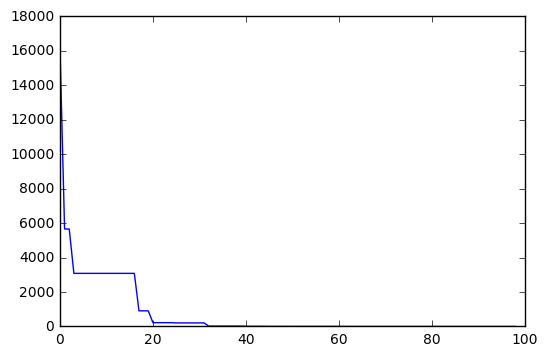

In [13]:
plt.plot(gbest_history)

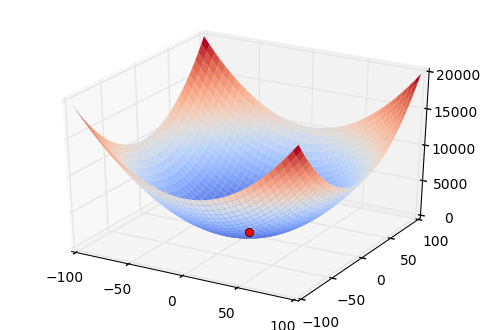

In [14]:
x = np.arange(-100,100,0.5)
y = np.arange(-100,100,0.5)
x, y = np.meshgrid(x,y)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, cost_function(x,y), cmap=cm.coolwarm, linewidth=0)

path_x = gbest[0,0]
path_y = gbest[0,1]
path_x, path_y = np.meshgrid(path_x, path_y)

point = ax.plot(path_x, path_y, cost_function(path_x, path_y),'--ro')

ax.hold(True)